# Framework Basado en Open Source para Materias de Ciencias Exactas

## Algunas de las herramientas

- Jupyter
- Python
- LaTeX
- nbflow
- matplotlib
- bqplot
- scipy
- etc...

## ¿Por qué LaTeX?

x^2

$x^2$

1 / sqrt(2 \* pi \* sigma \*\* 2) \* exp(-(x- mu)\*\* 2 / (x \* sigma \*\* 2)
                                         
$$\frac {1}{\sqrt {2\pi \sigma ^{2}}}e^{-{\frac{(x- \mu)^{2}}{2\sigma ^2}}}$$

## ¿Por qué Python?

<img src="./scipy_ecosystem.png" alt="Drawing" style="width: 1000px; height=1000px;" align="middle"/>

## ¿Por qué Jupyter?

$$\int_{0}^{\infty} \frac{\sin(x)}{x}dx = \frac{\pi}{2} $$

**¡¡¡Pero eso tiene un error!!!**

# Demo

## Inicialiación

In [42]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
from matplotlib import animation, rc
from matplotlib import style

# Jupyter Specifics
import matplotlib as mpl
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

plt.style.use('bmh')

%matplotlib inline

mpl.rcParams['figure.figsize'] = (20.0, 6.0)
rc('animation', html='html5')

## Analisis 1

In [43]:
def f(a, b, c):
    x = np.linspace(-5,5,100)
    y = a*x**2+b*x+c
    plt.title("Expresion: $ax^2 + bx + c$ \n a = {}, b = {}, c = {}".format(a,b,c))
    plt.ylim(-10,10)
    plt.xlim(-5,5)
    plt.grid(color='grey', linewidth=0.5)
    plt.plot(x, y)

In [44]:
interactive_f = interact(f,
         a=FloatSlider(min=-5, max=6, step=0.25, value=1, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=6, step=1, value=0, layout=Layout(width='99%')),
         c=FloatSlider(min=-5, max=6, step=1, value=1, layout=Layout(width='99%')),);

interactive(children=(FloatSlider(value=1.0, description='a', layout=Layout(width='99%'), max=6.0, min=-5.0, step=0.25), FloatSlider(value=0.0, description='b', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), FloatSlider(value=1.0, description='c', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [45]:
def f2(a, b, c):
    x = np.linspace(-5,5,1000)
    y = (a*x+b)**2+c
    plt.title("Expresion: $(ax+b)^2 + c$ \n a = {}, b = {}, c = {}".format(a,b,c))
    plt.ylim(-1,20)
    plt.xlim(-5,5)
    plt.grid(color='grey', linewidth=0.5)
    plt.plot(x, y)

In [46]:
interact(f2, 
         a=FloatSlider(min=-5, max=6, step=0.25, value=1, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=6, step=1, value=0, layout=Layout(width='99%')),
         c=FloatSlider(min=-5, max=6, step=1, value=1, layout=Layout(width='99%')),);

interactive(children=(FloatSlider(value=1.0, description='a', layout=Layout(width='99%'), max=6.0, min=-5.0, step=0.25), FloatSlider(value=0.0, description='b', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), FloatSlider(value=1.0, description='c', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [47]:
from matplotlib.patches import Polygon
import scipy.integrate as integrate


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


def f3(a, b):
    x = np.linspace(0, 10)
    y = func(x)

    fig, ax = plt.subplots()
    plt.plot(x, y, linewidth=2)
    plt.ylim(ymin=0)

    # Make the shaded region
    ix = np.linspace(a, b)
    iy = func(ix)
    verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
             horizontalalignment='center', fontsize=20)

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))

    inte = int(integrate.quad(func, a, b)[0])
    plt.title("Expressión: $(x - 3)(x - 5)(x - 7) + 85$ " + "--- $a = {}, b= {}$ ---".format(a, b) +
              " $\int_a^b f(x)\mathrm{d}x" + " = {0}$".format(inte))
    plt.show()

In [48]:
interact(f3, 
         a=FloatSlider(min=-5, max=10, step=0.25, value=2, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=10, step=0.25, value=9, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=2.0, description='a', layout=Layout(width='99%'), max=10.0, min=-5.0, step=0.25), FloatSlider(value=9.0, description='b', layout=Layout(width='99%'), max=10.0, min=-5.0, step=0.25), Output()), _dom_classes=('widget-interact',))

In [49]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

In [50]:
x = sy.Symbol('x')
f = sin(x) * x**2

def animate(j):
    if j % 2 == 0:
        return []
    
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    if j == 1:
        plt.plot(x1,np.sin(x1) * x1**2,label='$sin(x) x^2$')
    y1 = []
    func = taylor(f,0,j)
    print(j, 'Taylor expansion at n='+str(j),func)
    for k in x1:
        y1.append(func.subs(x,k))
    plt.plot(x1,y1,label='order '+str(j))

    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    return []

# Plot results
def plot():
    fig, ax = plt.subplots();  
    anim = animation.FuncAnimation(fig, animate, frames=10, interval=500, blit=True);
    return anim

1 Taylor expansion at n=1 0
3 Taylor expansion at n=3 x**3
5 Taylor expansion at n=5 -x**5/6 + x**3
7 Taylor expansion at n=7 x**7/120 - x**5/6 + x**3
9 Taylor expansion at n=9 -x**9/5040 + x**7/120 - x**5/6 + x**3


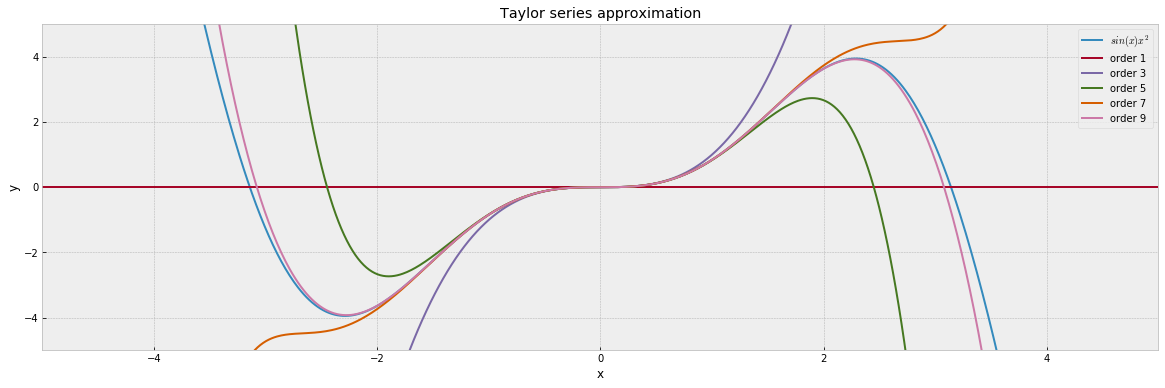

In [51]:
anim = plot()
HTML(anim.to_html5_video())

In [52]:
x = sy.Symbol('x')
f = sin(x)

def f4(order):  
    x_lims = [-10, 10]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    plt.plot(x1,np.sin(x1),label='sin of x')
    y1 = []
    func = taylor(f,0,order)
    for k in x1:
        y1.append(func.subs(x,k))
    plt.plot(x1,y1,label='order '+str(order))
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

In [53]:
interact(f4, order=IntSlider(min=1, max=15, step=2, value=1, layout=Layout(width='99%')),);

interactive(children=(IntSlider(value=1, description='order', layout=Layout(width='99%'), max=15, min=1, step=2), Output()), _dom_classes=('widget-interact',))

## Estadística e Inteligencia Artificial

## Regresión Lineal

In [54]:
import numpy as np
import pandas as pd
import os
import math
import time
import datetime
from statistics import mean
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from bqplot import pyplot as bplt

%matplotlib inline

In [85]:
def create_dataset(number, variance, step=2, correlation=1, offset=(0, 1)):
    x_off, y_off = offset
    xs = np.arange(x_off, number + x_off)
    ys = np.arange(y_off, number*step + y_off, step)
    if correlation == -1:
        ys = ys[::-1]
    ys += np.random.randint(-variance, variance, size=number)
    return xs, ys

def best_fit_slope(xs, ys):
    x_mean = xs.mean()
    y_mean = ys.mean()
    m = ((xs - x_mean) * (ys - y_mean)).sum() / ((xs - x_mean)**2).sum()
    b = y_mean - m * x_mean
    return m, b

def squared_error(y_initial, y_final):
    return ((y_initial - y_final) ** 2).sum()

def coeff_of_determination(y_initial, y_final):
    ser = squared_error(y_initial, y_final)
    sem = squared_error(y_initial, y_initial.mean())
    return 1 - (ser / sem)

def calc_y(x, m=None, b=None):
    if None in [m, b]:
        m, b = best_fit_slope(xs1, ys1)
    return m * x + b

def add_point(target):
    m, b = best_fit_slope(scat.x, scat.y)
    y_hat.x = scat.x
    y_hat.y = calc_y(scat.x, m, b)

In [86]:
xs1, ys1 = create_dataset(40,20,2, 1, offset=(10,100))
coeff_of_determination(ys1, calc_y(xs1))

0.7983413819028395

In [93]:
bplt.clear() # BQplot code
figure = bplt.figure(title='Regression', animation_duration=500) # BQplot code
scat = bplt.scatter(xs1, ys1, enable_move=True, interactions={'click': 'add'} )
scat.observe(add_point, names=['x'])
y_hat = bplt.plot(xs1, calc_y(xs1))
bplt.show()

/home/ezequiel/anaconda3/lib/python3.6/site-packages/bqplot/pyplot.py:603: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  issubdtype(dtype, Scale.scale_types[key].dtype)


VBox(children=(Figure(animation_duration=500, axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['steelblue'], enable_move=True, interactions={'click': 'add'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), y=array([117, 115,  86,  97, 105,  95,  96,  99, 121, 130, 122, 137, 117,
       111, 111, 145, 121, 122, 139, 122, 129, 144, 135, 163, 128, 147,
       134, 173, 141, 155, 140, 149, 158, 170, 183, 189, 171, 177, 179,
       189])), Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), y=array([ 94.94512195,  97.07870544,  99.21228893, 101.34587242,
       103.47945591, 105.6130394 , 107.74662289, 109.88020638,
       112.01378987, 114.14737336, 116.28095685, 118.41454034,
       120.54812383, 122.68170732, 124.81529081, 126.9488743 ,
       129.08245779, 131.21604128, 133.34962477, 135.48320826,
       137.61679174, 139.75037523, 141.88395872, 144.01754221,
       146.1511257 , 148.28470919, 150.41829268, 152.55187617,
       154.68545966, 156.81904315, 158.95262664, 161.08621013,
       163.21979362, 165.35337711, 167.4869606 , 169.62054409,
       171.75412758, 173.88771107, 176.02129456, 178.15487805]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Regression'), Toolbar(figure=Figure(animation_duration=500, axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['steelblue'], enable_move=True, interactions={'click': 'add'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), y=array([117, 115,  86,  97, 105,  95,  96,  99, 121, 130, 122, 137, 117,
       111, 111, 145, 121, 122, 139, 122, 129, 144, 135, 163, 128, 147,
       134, 173, 141, 155, 140, 149, 158, 170, 183, 189, 171, 177, 179,
       189])), Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([10, 11, 12, 13, 1

## K Nearest Neigbors

In [58]:
from collections import Counter

In [88]:
def euclidean_distance(p1, p2):
    dim = len(p1)
    radical = sum((c1 - c2)**2 for c1, c2 in zip(p1, p2))
    return (radical)**(1/dim)

def euclidean_distance_numpy(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    dim = len(p1)
    return ((p1 - p2)**2).sum()**(1/dim)

In [89]:
def k_neares_neighbors(data, predict, k=3):
    if len(data) >= k:
        print('You may change k')
    distances = []
    for group in data:
        for features in data[group]:
            distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result     

In [91]:
dataset = {
    'black':[[1, 2],[2,3],[3,1]],
    'green':[[6,5],[7,7],[8,6]]
}

def add_point(target):
    x, y = scat.x[-1], scat.y[-1]
    class_ = k_neares_neighbors(dataset_, [x, y])
    dataset_[class_].append([x, y])
    bplt.scatter([x], [y], enable_move=True, colors=[class_])

In [92]:
bplt.clear() # BQplot code
figure = bplt.figure(title='K nearest neighbors - Click to add points', animation_duration=500) # BQplot code
dataset_ = dataset.copy()
scat = bplt.scatter([0], [0], interactions={'click': 'add'}, colors=['white'])
for color in dataset_:
    xs, ys = zip(*dataset_[color])
    bplt.scatter(xs, ys, colors=[color])
scat.observe(add_point, names=['x'])
bplt.show()

/home/ezequiel/anaconda3/lib/python3.6/site-packages/bqplot/pyplot.py:603: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  issubdtype(dtype, Scale.scale_types[key].dtype)


VBox(children=(Figure(animation_duration=500, axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['white'], interactions={'click': 'add'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([0]), y=array([0])), Scatter(colors=['black'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([1, 2, 3]), y=array([2, 3, 1])), Scatter(colors=['green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([6, 7, 8]), y=array([5, 7, 6]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='K nearest neighbors - Click to add points'), Toolbar(figure=Figure(animation_duration=500, axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['white'], interactions={'click': 'add'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([0]), y=array([0])), Scatter(colors=['black'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([1, 2, 3]), y=array([2, 3, 1])), Scatter(colors=['green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([6, 7, 8]), y=array([5, 7, 6]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='K nearest neighbors - Click to add points'))))

## Matemática Superior

In [63]:
import matplotlib.lines as mlines
from matplotlib.collections import LineCollection
from scipy.integrate import odeint
mpl.rcParams['figure.figsize'] = (20.0, 6.0)

In [64]:
def main(sueldo_inicial, tasa_ahorro, tasa_gasto_extra, gasto_fijo_diario, dias):
    ca = tasa_ahorro * sueldo_inicial
    def function(c, t):
        if c <= ca:
            tasa_salida = 0
        else:
            tasa_salida = tasa_gasto_extra*(c-ca)
        return -gasto_fijo_diario-tasa_salida
    t = np.linspace(0,dias,dias*10)
    y = odeint(function, sueldo_inicial, t)
    
    #Graphic details
    axes = plt.gca()
    axes.set_xlim([0,dias])
    axes.set_ylim([0,sueldo_inicial*1.1])
    plt.plot((0,dias),(ca,ca), label='Colchon de ahorro')
    plt.plot(t,y, label='Capital(t)')
    plt.xticks(np.arange(0, dias, 1))
    plt.yticks(np.arange(0, sueldo_inicial*1.1, sueldo_inicial/20))
    plt.legend(loc='best')
    plt.xlabel('Días')
    plt.ylabel('Capital $')
    plt.grid()
    plt.show()

## Economía Doméstica

In [65]:
interact(main, 
        sueldo_inicial=IntSlider(min=0,max=25000,step=500,value=15000, layout=Layout(width='100%')),
        tasa_ahorro=FloatSlider(min=0,max=1,step=0.005,value=0.2, layout=Layout(width='100%')),
        tasa_gasto_extra=FloatSlider(min=0,max=1,step=0.005,value=0.3, layout=Layout(width='100%')),
        gasto_fijo_diario=IntSlider(min=1,max=1000,step=1,value=100, layout=Layout(width='100%')),
        dias=IntSlider(min=1,max=360,step=1,value=30, layout=Layout(width='100%'))
        );

interactive(children=(IntSlider(value=15000, description='sueldo_inicial', layout=Layout(width='100%'), max=25000, step=500), FloatSlider(value=0.2, description='tasa_ahorro', layout=Layout(width='100%'), max=1.0, step=0.005), FloatSlider(value=0.3, description='tasa_gasto_extra', layout=Layout(width='100%'), max=1.0, step=0.005), IntSlider(value=100, description='gasto_fijo_diario', layout=Layout(width='100%'), max=1000, min=1), IntSlider(value=30, description='dias', layout=Layout(width='100%'), max=360, min=1), Output()), _dom_classes=('widget-interact',))

## Casas y Aires Acondicionados

In [66]:
def main(tiempo_promedio_casa, tiempo_promedio_aire, total_casas, dias):
    k1 = 1/tiempo_promedio_casa
    k2 = 1/tiempo_promedio_aire
    def function(s, t):
        y, x = s
        dydt = [k1*(total_casas-y), k2*(y-x)]
        return dydt
    
    t = np.linspace(0,dias,dias*10)
    s0 = [0,0]
    sol = odeint(function, s0, t)

    #Graphic details
    plt.gca().set_xlim([0, dias])
    plt.gca().set_ylim([0, total_casas*1.1])
    plt.plot(t, sol[:, 0], 'b', label='Casas(t)')
    plt.plot(t, sol[:, 1], 'g', label='Aires(t)')
    plt.plot((0,dias),(total_casas,total_casas), label='Total casas')
    plt.xticks(np.arange(0, dias, 3))
    plt.yticks(np.arange(0, total_casas*1.1, total_casas/20))
    plt.legend(loc='best')
    plt.xlabel('Meses')
    plt.ylabel('Unidades')
    plt.grid()
    
    plt.show()

In [67]:
interact(main,
        total_casas=IntSlider(min=1,max=10000,step=100,value=1000, layout=Layout(width='100%')),
        tiempo_promedio_casa=IntSlider(min=1,max=24,step=1,value=5, layout=Layout(width='100%')),
        tiempo_promedio_aire=IntSlider(min=1,max=24,step=1,value=10, layout=Layout(width='100%')),
        dias=IntSlider(min=1,max=360,step=10,value=80, layout=Layout(width='100%'))
        );

interactive(children=(IntSlider(value=5, description='tiempo_promedio_casa', layout=Layout(width='100%'), max=24, min=1), IntSlider(value=10, description='tiempo_promedio_aire', layout=Layout(width='100%'), max=24, min=1), IntSlider(value=1000, description='total_casas', layout=Layout(width='100%'), max=10000, min=1, step=100), IntSlider(value=80, description='dias', layout=Layout(width='100%'), max=360, min=1, step=10), Output()), _dom_classes=('widget-interact',))

## Decaimiento Natural

In [68]:
def main(vida_media, ingesta_mg, ingesta_hs, periodos, horas):
    k1 = np.log(2)/vida_media
    
    def function(y, t):
        return -k1*y # y(t)
    
    sf = ingesta_hs
    s0 = ingesta_mg
    ts = []
    sols = []
    periodoActual = 0
    while periodoActual < periodos-1:
        t = np.arange(sf - ingesta_hs, sf, 0.0001)
        sol = odeint(function, s0, t)
        ts.extend(t)
        sols.extend(sol)
        sf += ingesta_hs
        s0 = sol[-1] + ingesta_mg
        periodoActual += 1
    t = np.arange(sf - ingesta_hs, sf + 4 * ingesta_hs, 0.0001)
    sol = odeint(function, s0, t)
    ts.extend(t)
    sols.extend(sol)
    
    
    plt.plot(ts,sols, 'b', label='Droga en organismo(t)')
    
    #Graphic details
    plt.gca().set_xlim([0, horas])
    plt.gca().set_ylim([0, max(sols)*1.05])
    plt.xticks(np.arange(0, horas, 1))
    plt.yticks(np.arange(0, sol.max()*1.05, 0.0005))
    plt.legend(loc='best')
    plt.xlabel('Horas')
    plt.ylabel('Temp')
    plt.grid()
    
    plt.show()

In [69]:
interact(main,        
        vida_media=FloatSlider(min=0,max=24,step=0.01,value=3.8, layout=Layout(width='100%')),
        ingesta_mg=FloatSlider(min=0,max=1,step=0.001,value=0.01, layout=Layout(width='100%')),
        ingesta_hs=FloatSlider(min=0,max=24,step=0.1,value=6, layout=Layout(width='100%')),
        periodos=IntSlider(min=1,max=20,step=1,value=4, layout=Layout(width='100%')),
        horas=FloatSlider(min=1,max=80,step=0.1,value=40, layout=Layout(width='100%'))
        );

interactive(children=(FloatSlider(value=3.8, description='vida_media', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=0.01, description='ingesta_mg', layout=Layout(width='100%'), max=1.0, step=0.001), FloatSlider(value=6.0, description='ingesta_hs', layout=Layout(width='100%'), max=24.0), IntSlider(value=4, description='periodos', layout=Layout(width='100%'), max=20, min=1), FloatSlider(value=40.0, description='horas', layout=Layout(width='100%'), max=80.0, min=1.0), Output()), _dom_classes=('widget-interact',))

## Zorros y Liebres

In [70]:
def main(a, b, c, d, dias, liebres_inicial, zorros_inicial):

    def function(s, t):
        x, y = s
        dydt = [
            a*x-b*x*y, # x(t) → Liebres
            -c*y+d*x*y # y(t) → Zorros
        ]
        return dydt
    
    t = np.linspace(0,dias,dias*10)
    s0 = [
        liebres_inicial, #Liebres
        zorros_inicial #Zorros
    ]
    sol = odeint(function, s0, t)

    #Graphic details
    plt.plot(t, sol[:, 0], 'b', label='Liebres(t)')
    plt.plot(t, sol[:, 1], 'g', label='Zorros(t)')
    plt.legend(loc='best')
    plt.xlabel('Tiempo')
    plt.ylabel('Unidades')
    plt.grid()
    plt.show()
    plt.plot(sol[:, 0], sol[:, 1], 'g', label='Zorros(t)')
    plt.legend(loc='best')
    plt.xlabel('Liebres')
    plt.ylabel('Zorros')
    plt.grid()
    plt.show()

In [71]:
interact(main,        
        a=FloatSlider(min=0,max=24,step=0.01,value=1, layout=Layout(width='100%')),
        b=FloatSlider(min=0,max=24,step=0.01,value=1, layout=Layout(width='100%')),
        c=FloatSlider(min=0,max=24,step=0.01,value=1, layout=Layout(width='100%')),
        d=FloatSlider(min=0,max=24,step=0.01,value=1, layout=Layout(width='100%')),
        liebres_inicial=FloatSlider(min=0,max=24,step=0.01,value=2, layout=Layout(width='100%')),
        zorros_inicial=FloatSlider(min=0,max=24,step=0.01,value=1, layout=Layout(width='100%')),
        dias=FloatSlider(min=0,max=365,step=10,value=15, layout=Layout(width='100%')),
        );

interactive(children=(FloatSlider(value=1.0, description='a', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=1.0, description='b', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=1.0, description='c', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=1.0, description='d', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=15.0, description='dias', layout=Layout(width='100%'), max=365.0, step=10.0), FloatSlider(value=2.0, description='liebres_inicial', layout=Layout(width='100%'), max=24.0, step=0.01), FloatSlider(value=1.0, description='zorros_inicial', layout=Layout(width='100%'), max=24.0, step=0.01), Output()), _dom_classes=('widget-interact',))